<a href="https://colab.research.google.com/github/CMDRZero/DataScienceFundamentalsClass/blob/main/GranBellU3Proj_atmp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting the probability you die at a given age**

### Defining terms:
Cumulative death probability: The probability of a person having died before reaching a given age.

Death probability: The chance a person will die at that age, given they have made it that far (the whole year is the bucket)

Age probability: The chance that a person will die at a given age.

Via some math we can realize the latter is defined as the product of the inverse first with the second, being making it to that year and then dying. The two graphs both (almost) strictly increase with age whcih means the graph looks vaguely like a normal distribution.

To begin using python, we need to install the libraries we want to use if they arent already available. I dont strictly need preliz since I utimately use PyMc, but its nice to illustrate the graphs, so I'll install it.

In [1]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [2]:
import arviz as az
import pymc as pm     #The engine of prediction
import numpy as np
import preliz as pz   #We are using this so I can make the nice graphs of priors and likelyhoods

In [3]:
alive = [100000, 99392, 99350, 99324, 99305, 99289, 99275, 99262, 99249, 99238, 99227, 99218, 99207, 99193, 99171, 99139, 99096, 99041, 98974, 98894, 98802, 98695, 98575, 98444, 98306, 98162, 98014, 97862, 97704, 97541, 97372, 97198, 97017, 96830, 96638, 96438, 96231, 96017, 95794, 95564, 95327, 95081, 94825, 94557, 94275, 93979, 93665, 93331, 92973, 92588, 92171, 91720, 91232, 90702, 90125, 89497, 88814, 88075, 87278, 86422, 85506, 84527, 83482, 82376, 81212, 79994, 78714, 77366, 75950, 74468, 72915, 71283, 69559, 67732, 65791, 63725, 61519, 59165, 56669, 54041, 51288, 48404, 45385, 42243, 38996, 35663, 32273, 28858, 25457, 22119, 18895, 15840, 13006, 10439, 8172, 6226, 4615, 3327, 2336, 1598, 1068, 696, 442, 272, 163, 94, 52, 28, 14, 7, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
observed = np.array([])
for i in range(len(alive)-1):
  diff = alive[i]-alive[i+1]
  for j in range(diff):
    observed = np.concatenate((observed, np.array([i+(1+j)/diff])))
observed

array([1.64473684e-03, 3.28947368e-03, 4.93421053e-03, ...,
       1.10500000e+02, 1.11000000e+02, 1.13000000e+02])

<Axes: >

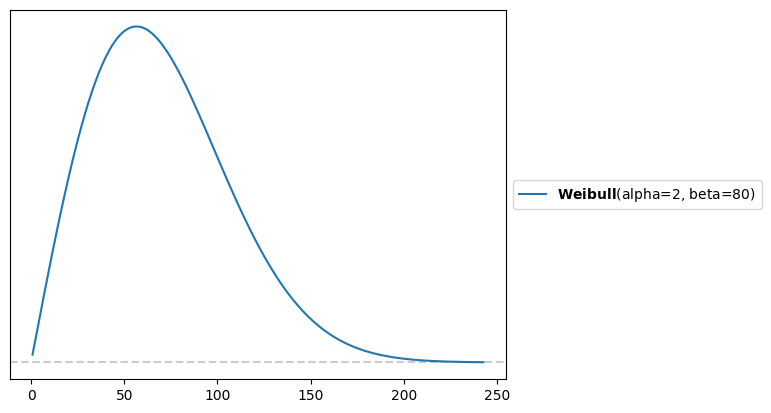

In [4]:
pz.Weibull(alpha = 2., beta = 80).plot_pdf()

<Axes: >

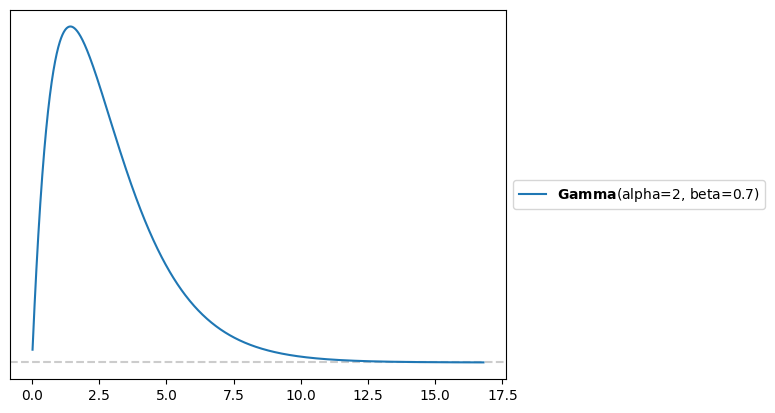

In [17]:
pz.Gamma(alpha = 2., beta = .7).plot_pdf()

In [18]:
#Define our model using the python `with` syntax
with pm.Model() as model:
  k = pm.Normal('k', mu = 80, sigma = 30)
  l = pm.Gamma('l', 2, .7) #The power function on failure rate is like to be above 1, must be above 0, and likely to fall off for high values

  y = pm.Weibull('y', alpha = l, beta = k, observed = observed)

  samples = pm.sample(1000)

Output()

Output()

In [19]:
pm.sample_posterior_predictive(samples, model=model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

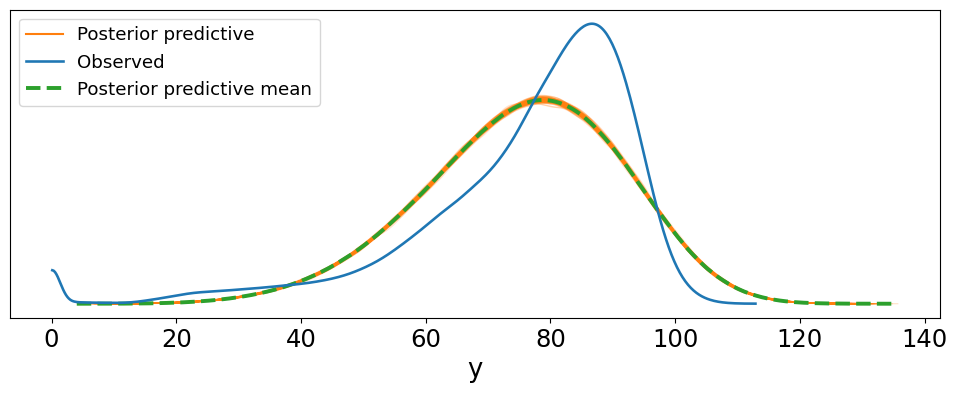

In [20]:
az.plot_ppc(samples, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])